# <span style="color:red"> Lecture 19 - More on Time Series </span>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# load in data
df_financial = pd.read_csv("data_raw/financial.csv")

# convert to datetime format
df_financial["date"] = pd.to_datetime(df_financial["date_str"])

In [3]:
display(df_financial)

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10
...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03


# <span style="color:red"> I. Date Formatting  </span>



<font size = "4">

Convert to string (a)


- A format code ```%``` is used to denote date formats
- Useful when working with text data

$\quad$ <img src="figures/wildcards_fig1.png" alt="drawing" width="300"/>

- Can access the ``.strftime()`` (string format time) method for the "date" column as follows:

In [4]:
# Grab column (Pandas Series)
print(type(df_financial["date"]))

# Access the collection of "DatetimeProperties" methods/attributes
print(type(df_financial["date"].dt))

# Use the ".strftime" method from that collection

display(df_financial["date"].dt.strftime("%d"))
print()
display(df_financial["date"].dt.strftime("%m"))


<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.accessors.DatetimeProperties'>


0       04
1       05
2       06
3       09
4       10
        ..
1300    29
1301    30
1302    31
1303    03
1304    04
Name: date, Length: 1305, dtype: object

0       04
1       04
2       04
3       04
4       04
        ..
1300    03
1301    03
1302    03
1303    04
1304    04
Name: date, Length: 1305, dtype: object

<font size = "4">

Let's add two columns:

- One called "month_str" which indicates what month the data in the row was taken from
- One called "week_str" which indicates what week the data in the row was taken from (roughly 52 weeks per year)

In [5]:
df_financial["month_str"] = df_financial["date"].dt.strftime("%m")

df_financial["week_str"] = df_financial["date"].dt.strftime("%W")
display(df_financial)


,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,month_str,week_str
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,04,14
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,04,14
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,04,14
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,04,15
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,04,15
...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,03,13
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,03,13
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,03,13
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,04,14


<font size = "4">

Convert to string (b)

$\quad$ <img src="figures/wildcards_fig2.png" alt="drawing" width="400"/>

<font size = "4">

Let's add two columns:

- One called "month_name" which indicates what month the data in the row was taken from
- One called "weekday_name" which indicates what week the data in the row was taken from (roughly 52 weeks per year)

In [6]:
df_financial["month_name"] = df_financial["date"].dt.strftime("%B")

df_financial["weekday_name"] = df_financial["date"].dt.strftime("%a")

display(df_financial)


,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,month_str,week_str,month_name,weekday_name
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,04,14,April,Wed
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,04,14,April,Thu
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,04,14,April,Fri
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,04,15,April,Mon
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,04,15,April,Tue
...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,03,13,March,Wed
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,03,13,March,Thu
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,03,13,March,Fri
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,04,14,April,Mon


<font size = "4">

- We can also insert format codes inside custom strings.
- Internally it will "fill-in-the-blank" with the corresponding information
- You can use commas, dashes (--), slash (/) or other characters

In [7]:
df_financial["another_date_col"] = df_financial["date"].dt.strftime("Year: %Y, Month: %m")


display(df_financial)


,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,month_str,week_str,month_name,weekday_name,another_date_col
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,04,14,April,Wed,"Year: 2018, Month: 04"
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,04,14,April,Thu,"Year: 2018, Month: 04"
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,04,14,April,Fri,"Year: 2018, Month: 04"
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,04,15,April,Mon,"Year: 2018, Month: 04"
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,04,15,April,Tue,"Year: 2018, Month: 04"
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,03,13,March,Wed,"Year: 2023, Month: 03"
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,03,13,March,Thu,"Year: 2023, Month: 03"
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,03,13,March,Fri,"Year: 2023, Month: 03"
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,04,14,April,Mon,"Year: 2023, Month: 04"


<font size = "4">

**Exercise:**

- Create a new column called "date_test" <br>
  which has the format using ```.dt.strftime()```
  
$\quad$ ```Monday, December 31, 2023 ```

In [8]:
# Write your own code
df_financial["date_test"] = df_financial["date"].dt.strftime("%A, %B %d, %Y")

df_financial

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,month_str,week_str,month_name,weekday_name,another_date_col,date_test
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,04,14,April,Wed,"Year: 2018, Month: 04","Wednesday, April 04, 2018"
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,04,14,April,Thu,"Year: 2018, Month: 04","Thursday, April 05, 2018"
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,04,14,April,Fri,"Year: 2018, Month: 04","Friday, April 06, 2018"
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,04,15,April,Mon,"Year: 2018, Month: 04","Monday, April 09, 2018"
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,04,15,April,Tue,"Year: 2018, Month: 04","Tuesday, April 10, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,03,13,March,Wed,"Year: 2023, Month: 03","Wednesday, March 29, 2023"
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,03,13,March,Thu,"Year: 2023, Month: 03","Thursday, March 30, 2023"
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,03,13,March,Fri,"Year: 2023, Month: 03","Friday, March 31, 2023"
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,04,14,April,Mon,"Year: 2023, Month: 04","Monday, April 03, 2023"


<font size = "4">

When you use ``pd.to_datetime``, Pandas tries to **guess** the correct format automatically. It usually works, but it's good practice to explicitly give the format of the date to Pandas for two reasons:

- If you give Pandas the format, it makes for quicker code, because Pandas can skip the "guess the format" part.

- It can sometimes guess wrong: Does "6/10/2025" mean June 10th, 2025 or October 6th, 2025?


In [9]:
display(df_financial)

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,month_str,week_str,month_name,weekday_name,another_date_col,date_test
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,04,14,April,Wed,"Year: 2018, Month: 04","Wednesday, April 04, 2018"
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,04,14,April,Thu,"Year: 2018, Month: 04","Thursday, April 05, 2018"
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,04,14,April,Fri,"Year: 2018, Month: 04","Friday, April 06, 2018"
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,04,15,April,Mon,"Year: 2018, Month: 04","Monday, April 09, 2018"
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,04,15,April,Tue,"Year: 2018, Month: 04","Tuesday, April 10, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,03,13,March,Wed,"Year: 2023, Month: 03","Wednesday, March 29, 2023"
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,03,13,March,Thu,"Year: 2023, Month: 03","Thursday, March 30, 2023"
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,03,13,March,Fri,"Year: 2023, Month: 03","Friday, March 31, 2023"
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,04,14,April,Mon,"Year: 2023, Month: 04","Monday, April 03, 2023"


In [10]:
# Combine format codes + characters depending on the input
# Can include spaces, commas, "/", "-" or any other formatting
# Be careful to include the format code letters in upper or lower case 
# depending on the intended format 

df_financial["date"] = pd.to_datetime(df_financial["date_str"], format = "%m/%d/%Y")


df_financial["date_ex1_dt"] = pd.to_datetime(df_financial["date_ex1"], format = "%B %d %Y")

df_financial["date_ex2_dt"] = pd.to_datetime(df_financial["date_ex2"], format = "%A, %Y-%m-%d")


<font size = "4">

**Exercise:**

- Parse the column "data_ex3" using ``pd.to_datetime()``, including the "format" argument.
- Take a close look at the formatting

HINT: Refer to the table of format codes <br>
 in the previous section

In [11]:
# your code here

df_financial["date_ex3_dt"] = pd.to_datetime(df_financial["date_ex3"], 
    format = "%d-%b-%y")

df_financial


,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,month_str,week_str,month_name,weekday_name,another_date_col,date_test,date_ex1_dt,date_ex2_dt,date_ex3_dt
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,04,14,April,Wed,"Year: 2018, Month: 04","Wednesday, April 04, 2018",2018-04-04,2018-04-04,2018-04-04
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,04,14,April,Thu,"Year: 2018, Month: 04","Thursday, April 05, 2018",2018-04-05,2018-04-05,2018-04-05
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,04,14,April,Fri,"Year: 2018, Month: 04","Friday, April 06, 2018",2018-04-06,2018-04-06,2018-04-06
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,04,15,April,Mon,"Year: 2018, Month: 04","Monday, April 09, 2018",2018-04-09,2018-04-09,2018-04-09
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,04,15,April,Tue,"Year: 2018, Month: 04","Tuesday, April 10, 2018",2018-04-10,2018-04-10,2018-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,03,13,March,Wed,"Year: 2023, Month: 03","Wednesday, March 29, 2023",2023-03-29,2023-03-29,2023-03-29
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,03,13,March,Thu,"Year: 2023, Month: 03","Thursday, March 30, 2023",2023-03-30,2023-03-30,2023-03-30
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,03,13,March,Fri,"Year: 2023, Month: 03","Friday, March 31, 2023",2023-03-31,2023-03-31,2023-03-31
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,04,14,April,Mon,"Year: 2023, Month: 04","Monday, April 03, 2023",2023-04-03,2023-04-03,2023-04-03


# <span style="color:red"> II. Grouping  </span>


<font size = "4">

- In our DataFrame, we have a different date in each row.

- If we tried to use ``.groupby()``, it wouldn't really do any grouping, since all the dates are unique.

- But we **should** be able to group by date: for example, group by year, group by month, group by day of the week.

- To do this we need another method: ``pandas.Grouper()``

In [12]:
# In "freq" specify the letter for the level of aggregation
# There are also more advanced options!

month_config = pd.Grouper(key = 'date', freq = 'ME')
print(month_config)
print(type(month_config))

TimeGrouper(key='date', freq=<MonthEnd>, axis=0, sort=True, dropna=True, closed='right', label='right', how='mean', convention='e', origin='start_day')
<class 'pandas.core.resample.TimeGrouper'>


<font size = "4">

See the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) for a list of strings that can be used for the "freq" argument

In [13]:
# Group on the period column
# We use a wrapper () to split the command into multiple lines
# The ".reset_index()" option ensures that the grouper is
# converted to a column. This is important for plotting.
# There's a lot of options too

monthlydata = (df_financial.groupby(month_config).
            agg(sp500_mean = ("sp500", "mean")).
            reset_index())

display(monthlydata)


,date,sp500_mean
0,2018-04-30,2659.463158
1,2018-05-31,2701.493636
2,2018-06-30,2754.352857
3,2018-07-31,2793.643333
4,2018-08-31,2857.820435
...,...,...
56,2022-12-31,3912.380952
57,2023-01-31,3960.656500
58,2023-02-28,4079.684737
59,2023-03-31,3968.559130


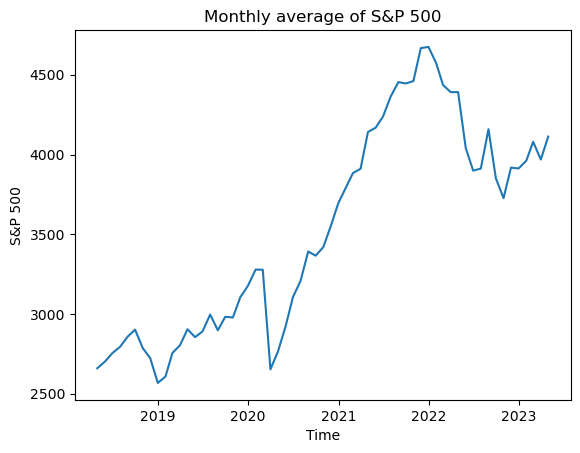

In [14]:
# Plot the monthly average
plt.plot("date", "sp500_mean", data = monthlydata)
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Monthly average of S&P 500")
plt.show()



<font size = "4">

**Exercise:**

- Compute an aggregate dataset which computes the standard <br>
deviation of the S&P 500 at the **weekly** level.
- Generate a line plot with your results

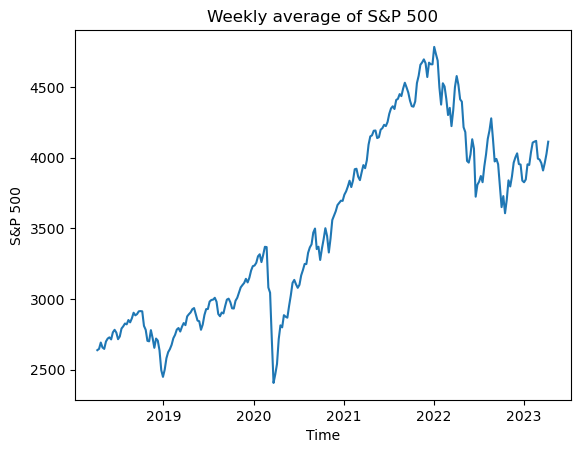

In [15]:
# your code here

week_config = pd.Grouper(key = 'date', freq = 'W')

weeklydata = (df_financial.groupby(week_config).
            agg(sp500_mean = ("sp500", "mean")).
            reset_index())

plt.plot("date", "sp500_mean", data = weeklydata)
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Weekly average of S&P 500")
plt.show()


# <span style="color:red"> III. Pivoting/Melting  </span>

<font size = "5">

Wide and long format

<font size = "4">

Data can come in a wide variety of formats

- Few rows, multiple columns (wide)
- Stacked rows, few columns (long)
- The **information** is the same!
- Wide format is usually more convenient for humans
- Long format is usually more convenient for coding

<font size = "4">

Wide to long
$\quad$ <img src="figures/melt_fig.png" alt="drawing" width="550"/>

We can convert from "wide format" to "long format" using ``pandas.melt``. We need to specify:

- var_name : Just a string naming the variable column
- value_name : A string naming the value column
- id_vars : The column(s) that should be used as the **identifier** variable.
- value_vars : The columns that should be combined into the single variable column

In [16]:
display(df_financial[["date", "sp500", "djia"]])

,date,sp500,djia
0,2018-04-04,2644.69,24264.30
1,2018-04-05,2662.84,24505.22
2,2018-04-06,2604.47,23932.76
3,2018-04-09,2613.16,23979.10
4,2018-04-10,2656.87,24408.00
...,...,...,...
1300,2023-03-29,4027.81,32717.60
1301,2023-03-30,4050.83,32859.03
1302,2023-03-31,4109.31,33274.15
1303,2023-04-03,4124.51,33601.15


In [17]:
# convert to "long" format

financial_long = pd.melt(df_financial,
                var_name = "market_index",
                value_name = "index_value",
                id_vars = "date",
                value_vars = ["sp500", "djia"])


In [18]:
display(financial_long)
print()
display(financial_long.sort_values(by = "date"))

,date,market_index,index_value
0,2018-04-04,sp500,2644.69
1,2018-04-05,sp500,2662.84
2,2018-04-06,sp500,2604.47
3,2018-04-09,sp500,2613.16
4,2018-04-10,sp500,2656.87
...,...,...,...
2605,2023-03-29,djia,32717.60
2606,2023-03-30,djia,32859.03
2607,2023-03-31,djia,33274.15
2608,2023-04-03,djia,33601.15


,date,market_index,index_value
0,2018-04-04,sp500,2644.69
1305,2018-04-04,djia,24264.30
1306,2018-04-05,djia,24505.22
1,2018-04-05,sp500,2662.84
2,2018-04-06,sp500,2604.47
...,...,...,...
1302,2023-03-31,sp500,4109.31
2608,2023-04-03,djia,33601.15
1303,2023-04-03,sp500,4124.51
1304,2023-04-04,sp500,4100.60


In [19]:
# compute average of sp500 and Dow Jones from original DataFrame
df_means = df_financial[ ["sp500", "djia"] ].mean()

display(df_means)

# compute average of sp500 and Dow Jones from long format
df_means2 = (financial_long.
    groupby("market_index")["index_value"].mean())

display(df_means2)


sp500     3513.889397
djia     29464.149206
dtype: float64

market_index
djia     29464.149206
sp500     3513.889397
Name: index_value, dtype: float64

<font size = "4">

What's the point?

Imagine we had a DataFrame containing the following market indexes:

- S&P 500
- Dow Jones Industrial Average
- Nasdaq Composite
- DAX PERFORMANCE-INDEX
- FTSE 100 Index
- CAC 40
- Nikkei 225
- Hang Seng Index
- Brazil Stock Exchange Index
- MOEX Russia Index

Here's how we would compute the average of each index for (a) wide format, and (b) long format

In [20]:
# Hypothetical situation. 
# These dataframes don't exist, so we won't run this code
run_cell = False

if run_cell:
    # wide format
    df_hypothetical[["sp500", "djia", "nasdaq", "DAX-perf", 
        "FTSE", "CAC40", "Nikkei", "Hang_Seng", "Brazil_SE", 
        "MOEX_Russia"]].mean()

    # after converting to long format
    (hypothetical_long.
        groupby("market_index")["index_value"].mean())

<font size = "4">

Long to wide
$\quad$ <img src="figures/pivot_fig.png" alt="drawing" width="550"/>

We can convert from "long format" to "wide format" using ``pandas.pivot``. We need to specify:

- columns : The column we should use to make the new DataFrame's columns.
- values : The column(s) we should use to fill in the values of the new DataFrame's columns 
- index : The column that should be used as the new DataFrame's **index** column

In [21]:
display(financial_long)

,date,market_index,index_value
0,2018-04-04,sp500,2644.69
1,2018-04-05,sp500,2662.84
2,2018-04-06,sp500,2604.47
3,2018-04-09,sp500,2613.16
4,2018-04-10,sp500,2656.87
...,...,...,...
2605,2023-03-29,djia,32717.60
2606,2023-03-30,djia,32859.03
2607,2023-03-31,djia,33274.15
2608,2023-04-03,djia,33601.15


In [22]:
financial_wide = pd.pivot(financial_long,
                    index = "date",
                    columns = "market_index",
                    values = "index_value")

display(financial_wide)

# If you also want the index to be part of the dataset add
# ".reset_index()" to the end of the previous command

financial_wide = pd.pivot(financial_long,
                    index = "date",
                    columns = "market_index",
                    values = "index_value").reset_index()

display(financial_wide)

market_index,djia,sp500
date,,
2018-04-04,24264.30,2644.69
2018-04-05,24505.22,2662.84
2018-04-06,23932.76,2604.47
2018-04-09,23979.10,2613.16
2018-04-10,24408.00,2656.87
...,...,...
2023-03-29,32717.60,4027.81
2023-03-30,32859.03,4050.83
2023-03-31,33274.15,4109.31


market_index,date,djia,sp500
0,2018-04-04,24264.30,2644.69
1,2018-04-05,24505.22,2662.84
2,2018-04-06,23932.76,2604.47
3,2018-04-09,23979.10,2613.16
4,2018-04-10,24408.00,2656.87
...,...,...,...
1300,2023-03-29,32717.60,4027.81
1301,2023-03-30,32859.03,4050.83
1302,2023-03-31,33274.15,4109.31
1303,2023-04-03,33601.15,4124.51


<font size = "4">

**Exercise:**

In the cell below, we'll add the "percentage growth" columns from Lecture 18.

- Convert the "growth_sp500" and
"growth_djia" to long format using ``.melt()``

- Convert back to wide format using ``.pivot()``

In [23]:
df_financial["growth_djia"] = (df_financial["djia"].diff()
         / df_financial["djia"].shift(1) )* 100

df_financial["growth_sp500"] = (df_financial["sp500"].diff()
         / df_financial["sp500"].shift(1) )* 100

In [24]:
# your code here

# step 1: extract the 3 columns, save to a new DataFrame, then rename them
df_new = df_financial[["date", "growth_sp500", "growth_djia"]].copy()
df_new.rename(columns = {"growth_sp500" : "sp500", "growth_djia" : "djia"}, inplace=True)

# step 2: convert to long format

df_long = pd.melt(df_new, 
                var_name = "market_index",
                value_name = "percentage_growth", 
                id_vars = "date",
                value_vars = ["sp500", "djia"])

# step 3: convert back to wide format
df_wide = pd.pivot(df_long,
        index = "date",
        columns = "market_index",
        values = "percentage_growth")

# step 4: change the column names to have the "growth_" prefix
df_wide.rename(columns = {"sp500" : "growth_sp500", "djia" : "growth_djia"},
    inplace = True)
